In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager 
from pyod.models.knn import KNN  
from pyod.utils.data import generate_data, get_outliers_inliers 

In [6]:
# Specify the file path
data = pd.read_excel(r'C:\Users\Muthumanimaran\Dropbox\ML_AI\andromeda.xlsx')
print(data)

     HRN  spec
0     15  2.06
1    337  2.06
2    603  2.26
3    604  4.84
4    165  3.27
..   ...   ...
68  8930  5.22
69  8947  5.59
70  8967  5.30
71  9070  6.54
72  9080  6.38

[73 rows x 2 columns]


In [7]:
#Lets use elbow method to find the ideal number of groups to divide the data

D:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


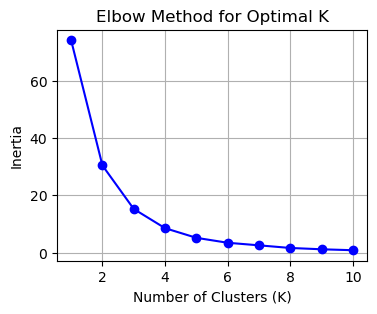

In [8]:
# Initialize a list to store inertia values
inertia = []

# Define a range of K values to test
k_range = range(1, 11)

# Calculate the inertia for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['spec']])
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(4, 3))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [9]:
#the above result shows that the ideal K is 3.

In [10]:
from sklearn.cluster import KMeans
k = 3  # Replace with your chosen K
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['spec']])

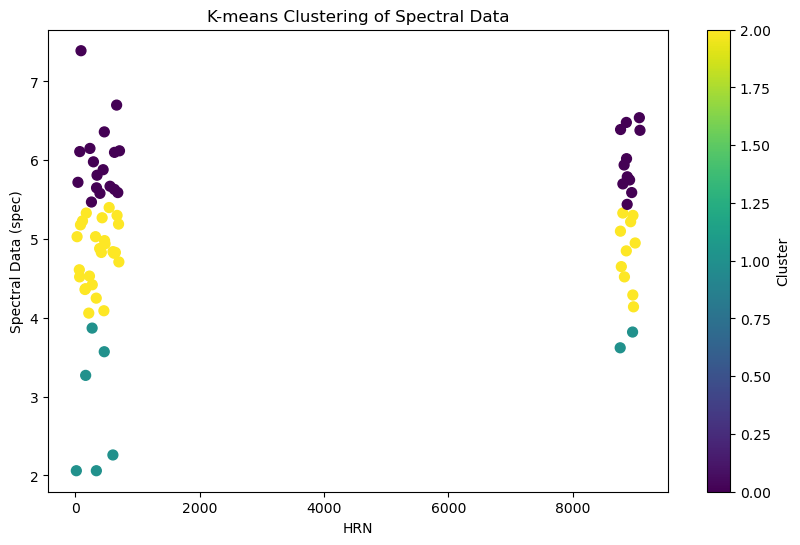

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data['HRN'], data['spec'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('HRN')
plt.ylabel('Spectral Data (spec)')
plt.title('K-means Clustering of Spectral Data')
plt.colorbar(label='Cluster')
plt.show()

In [12]:
#GREEN region corresponds to Brighter stars - apparently there are only few brigter stars in Andromeda galaxy
#Yellow region corresponds to slightly fainter stars and purple stars not visible so easily.

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
# Setting the percentage of outliers
outlier_fraction = 0.1

# Extracting the features (HRN and spec) from your data
X_data = data[['HRN', 'spec']].values

# Initializing the Isolation Forest model
model = IsolationForest(contamination=outlier_fraction, random_state=42)

# Fitting the model to your data
model.fit(X_data)

# Predicting the labels (inlier or outlier) for each data point
y_pred = model.predict(X_data)

# Separating outliers and inliers
X_outliers = X_data[y_pred == -1]
X_inliers = X_data[y_pred == 1]

# Getting the counts of outliers and inliers
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

# Separating the two features (HRN and spec)
f1 = X_data[:, [0]].reshape(-1, 1)
f2 = X_data[:, [1]].reshape(-1, 1)

# Now, you can use 'f1' and 'f2' for further analysis or visualization.


Text(0, 0.5, 'Feature 2')

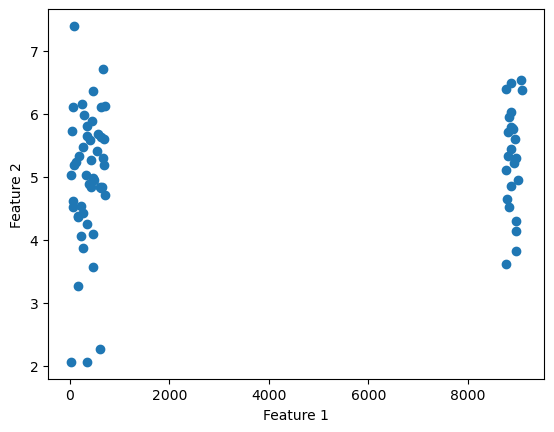

In [27]:
# Visualising the dataset 
# create a meshgrid 
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), 
                     np.linspace(-10, 10, 200)) 
  
# scatter plot 
plt.scatter(f1, f2) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 


In [29]:
from sklearn.neighbors import LocalOutlierFactor

# Setting the percentage of outliers
outlier_fraction = 0.1

# Creating a dataframe for the features
X_data = data[['HRN', 'spec']]

# Initializing the LocalOutlierFactor model
clf = LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)

# Fitting the model to your data and obtaining the anomaly scores
scores_pred = clf.fit_predict(X_data)

# Counting the number of anomalies
n_errors = (scores_pred == -1).sum()

print('The number of anomalies detected are ' + str(n_errors))

The number of anomalies detected are 8


ValueError: cannot reshape array of size 73 into shape (100,100)

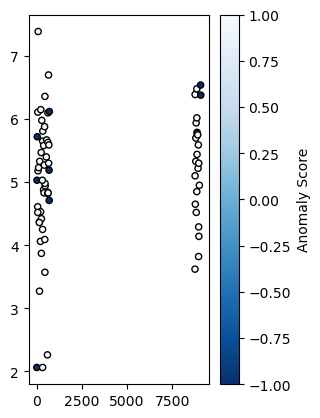

In [36]:
from scipy import stats 
from sklearn.neighbors import LocalOutlierFactor
# Assuming you have already trained the 'clf' model and calculated 'scores_pred'

# threshold value to consider a datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)

# Create a subplot for visualization
subplot = plt.subplot(1, 2, 1)

# Create a NumPy array from your data
X_data = data[['HRN', 'spec']].values

# Create a scatter plot of anomaly scores for the data points
scatter = subplot.scatter(X_data[:, 0], X_data[:, 1], c=scores_pred, cmap=plt.cm.Blues_r, s=20, edgecolor='k')

# Create a colorbar to show the anomaly scores
colorbar = plt.colorbar(scatter, ax=subplot)
colorbar.set_label('Anomaly Score')

# Draw a red contour line where the anomaly score is equal to the threshold
a = subplot.contour(X_data[:, 0].reshape(xx.shape), X_data[:, 1].reshape(xx.shape), Z, levels=[threshold], linewidths=2, colors='red')

subplot.axis('tight')

# Create a legend
subplot.legend(
    [a.collections[0]],
    ['Threshold'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='upper right'
)

subplot.set_title('Local Outlier Factor')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))

plt.show()

